**Notebook credit**: based on the F. Chollet's original notebook [here](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter05_fundamentals-of-ml.ipynb).

# Fundamentals of machine learning

## Generalization: The goal of machine learning

- we have looked at predicting movie reviews and house-price regression
- we split the data into a training set, a validation set, and a test set
- we should not evaluate the models on the same data they
were trained
- after just a few epochs, performance on never-before-seen data started diverging from performance on the training data
- training data performance always improves as training progresses
- at some point, the models started to **overfit**



**The fundamental issue in ML is the tension between optimization and generalization**

- optimization: process of adjusting a model to get the best performance possible on the training data
- generalization: how well the trained model performs on data it has never seen before
- key challenge: our *goal* is good generalization we can't directly control generalization
- can only fit the model to its training data
- do that too well: overfitting kicks in and generalization suffers

### Underfitting and overfitting

<img src="https://github.com/ambujtewari/stats315-winter2022/raw/main/images/overfitting.png" width="500">

Overfitting is particularly likely to occur when your data:
- is noisy
- involves uncertainty
- includes rare features

**Adding white-noise channels or all-zeros channels to MNIST**

- we will create new training set by concatenating 784 white noise dimensions to the existing 784 dimensions of the data
- we will also create an equivalent dataset by concatenating 784 all-zeros dimensions
- concatenation of meaningless features does not at all affect the information content of the data: we're only adding something
- human classification accuracy wouldn't be affected by these transformations at all


In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate( # add 784 features that are pure noise
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate( # add 784 features that are all-zeros
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 0s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2) # use first 80% as training, rest 20% as validation

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 15ms/step - loss: 0.6076 - accuracy: 0.8130 - val_loss: 0.3051 - val_accuracy: 0.9068
Epoch 2/10
375/375 [==============================] - 6s 15ms/step - loss: 0.2508 - accuracy: 0.9221 - val_loss: 0.1802 - val_accuracy: 0.9492
Epoch 3/10
375/375 [==============================] - 5s 13ms/step - loss: 0.1618 - accuracy: 0.9505 - val_loss: 0.1939 - val_accuracy: 0.9409
Epoch 4/10
375/375 [==============================] - 5s 14ms/step - loss: 0.1157 - accuracy: 0.9645 - val_loss: 0.1498 - val_accuracy: 0.9557
Epoch 5/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0840 - accuracy: 0.9741 - val_loss: 0.1384 - val_accuracy: 0.9607
Epoch 6/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0621 - accuracy: 0.9805 - val_loss: 0.1693 - val_accuracy: 0.9515
Epoch 7/10
375/375 [==============================] - 6s 17ms/step - loss: 0.0445 - accuracy: 0.9861 - val_loss: 0.1171 - val_accuracy: 0.9686

**Plotting a validation accuracy comparison**

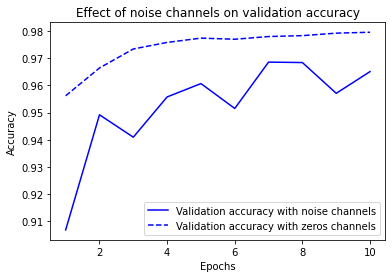

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

- deep learning models can be trained to fit anything, as long as they have enough representational power
- we will look at this "universal approximation" property later on in the course
- for now we will see a particular manifestation of this power
- we will shuffle the MNIST labels and train a model on that
- now there is no relationship whatsoever between the inputs and the shuffled labels
- however, the training loss goes down just fine, even with a relatively small model
- naturally, the validation loss does not improve at all over time

**Fitting a MNIST model with randomly shuffled labels**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=10,                         # increasing this will further increase the gap between training and validation accuracies
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 15ms/step - loss: 2.3161 - accuracy: 0.1021 - val_loss: 2.3053 - val_accuracy: 0.1046
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 2.2987 - accuracy: 0.1187 - val_loss: 2.3127 - val_accuracy: 0.1037
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 2.2910 - accuracy: 0.1278 - val_loss: 2.3167 - val_accuracy: 0.1022
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 2.2791 - accuracy: 0.1392 - val_loss: 2.3250 - val_accuracy: 0.1040
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 2.2626 - accuracy: 0.1539 - val_loss: 2.3366 - val_accuracy: 0.1023
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 2.2438 - accuracy: 0.1674 - val_loss: 2.3492 - val_accuracy: 0.1022
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 2.2210 - accuracy: 0.1803 - val_loss: 2.3590 - val_accuracy: 0.1042
Epoch

#### The manifold hypothesis

- how large is the space of 28 x 28 images with integer pixel values between 0 and 255?
- very few of these inputs would look like valid MNIST samples
- actual handwritten digits only occupy a tiny subspace of the parent space of all possible 28 × 28 `uint8` arrays
this subspace is highly structured:
  - it is continuous: if you take a sample and modify it a little, it will still be recognizable as the same handwritten digit
  - all samples in the valid subspace are connected by smooth paths that run through the subspace. This means that if you take two random MNIST digits A and B, there exists a sequence of “intermediate” images that morph A into B, such that two consecutive digits are very close to each other


- handwritten digits form a **manifold** within the space of possible 28 × 28 `uint8` arrays
- A "manifold" is a lower-dimensional subspace of some parent space that is locally similar to a linear (Euclidean) space
  - a smooth curve in the plane is a 1D manifold within a 2D space, because for every point of the curve, you can draw a tangent
  - a smooth surface within a 3D space is a 2D manifold

<img src="https://github.com/ambujtewari/stats315-winter2022/raw/main/images/MNIST_morphing.png" width="500">


**What is the manifold hypothesis?**

_All natural data lies on a low-dimensional manifold within the high-dimensional space where it is encoded._

- pretty strong statement about the structure of information in the universe
- as far as we know, it's accurate (*), and it's the reason why deep learning works
  - MNIST digits
  - human faces
  - tree morphology
  - sounds of the human voice
  - natural language

The manifold hypothesis implies:
- Machine learning models only have to fit relatively simple, low-dimensional, highly structured subspaces within their potential input space (latent manifolds).
- Within one of these manifolds, it's always possible to *interpolate* between two inputs, that is to say, morph one into another via a continuous path along which all points fall on the manifold.
- The ability to interpolate between samples is the key to understanding generalization in deep learning.

`begin side note`

(*) it is natural to wonder what is the empirical evidence in favor of the manifold hypothesis. there is theoretical work on testing the manifold hypothesis:

[Testing the Manifold Hypothesis](https://arxiv.org/abs/1310.0425) by Charles Fefferman, Sanjoy Mitter, Hariharan Narayanan

but don't know if anyone has actually tested the hypothesis on empirical data. possible undergraduate thesis topic here?

`end side note`

#### Interpolation as a source of generalization

- if you have data points that can be interpolated, you can start making sense of points you've never seen before
- you can relate new points to other points that lie close on the manifold
- you can make sense of the totality of the space using only a sample of the space
- you can use interpolation to fill in the blanks
- interpolation on the latent manifold is different from linear interpolation in the parent space

<img src="https://github.com/ambujtewari/stats315-winter2022/raw/main/images/manifold_interpolation.png" width="500">

#### Why deep learning works

<img src="https://github.com/ambujtewari/stats315-winter2022/raw/main/images/why_deep_learning_works.png" height="500">

#### Training data is paramount

<img src="https://github.com/ambujtewari/stats315-winter2022/raw/main/images/training_data_paramount.png" height="300">

- suppose getting more data isn't possible
- the next best solution is to control model complexity
- or to add constraints on the smoothness of the model curve
- the process of fighting overfitting this way is called *regularization*
- we will review regularization techniques soon
- before you can start tweaking your model to help it generalize better, you'll need a way to assess how your model is currently doing
- therefore we next look at _model evaluation_

## Evaluating machine-learning models

### Training, validation, and test sets


- evaluating a model always boils down to splitting the available data into three sets: training, validation, and test
- train on the training data and evaluate your model on the validation data
- once your model is ready for prime time, you test it one final time on the test data, which is meant to be as similar as possible to production data
- then you can deploy the model in production

_Why not have two sets: a training set and a test set? You’d train on the training data and evaluate on the test data. Much simpler!_

- developing a model always involves tuning its configuration:
  - choosing the number of layers
  - the size of the layers
- these are called *hyperparameters* to distinguish them from the parameters (which are the network’s weights)
- this tuning is done by using as a feedback signal the performance of the model on the validation data

#### Simple hold-out validation

<img src="https://github.com/ambujtewari/stats315-winter2022/raw/main/images/holdout_validation.png" width="500">

#### K-fold validation

<img src="https://github.com/ambujtewari/stats315-winter2022/raw/main/images/K-fold_validation.png" width="600">

#### Iterated K-fold validation with shuffling

- this is for situations in which you have relatively little data available and you need to evaluate your model as precisely as possible
- consists of applying K-fold validation multiple times
- shuffle the data every time before splitting it `K` ways
- final score is the average of the scores obtained at each run of K-fold validation
- you end up training and evaluating `P * K` models (where `P` is the number of iterations you use), which can be very expensive.

### Beating a common-sense baseline

Important to ensure yor trained network is doing better than some simple baseline

- in the MNIST digit-classification example, a simple baseline would be a validation accuracy greater than 0.1 (random classifier)
- in the IMDB example, it would be a validation accuracy greater than 0.5
- **class imbalance**: you have a binary classification problem where 90% of samples belong to class A and 10% belong to class B
  - a classifier that always predicts A already achieves 0.9 in validation accuracy
  - you’ll need to do better than that